In [11]:

# Combine all of csv files of tweets for different months into one csv file 
import os
import pandas as pd
# specify the directory where the csv files are located
path = r"C:\Users\myloe\OneDrive\Desktop\Sentiment_analysis-1\New folder"

# get a list of all the csv files in the directory
files = os.listdir(path)
csv_files = [file for file in files if file.endswith('.csv')]

# create an empty DataFrame to store the combined data
df_combined = pd.DataFrame()
 
 
# loop through each csv file and read its contents into a DataFrame
for csv_file in csv_files:
    df = pd.read_csv(os.path.join(path, csv_file))
    df_combined = pd.concat([df_combined, df], ignore_index=True)

# write the combined data to a new csv file
df_combined.to_csv("2010-2021.csv", index=False)

#removing the twwets created by bots




In [12]:
import pandas as pd
import csv
import re 
import string
import http.client, urllib
from datetime import datetime, timedelta
import pytz
import nltk
import spacy
import wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import gensim
import gensim.models
import sklearn
import sklearn.decomposition


# Read the CSV file into a DataFrame
filtered_df=pd.read_csv(r'C:\Users\myloe\OneDrive\Desktop\Sentiment_analysis-1\2010-2021.csv')



#removing URls & Email Addresses
import re

def remove_urls_and_emails(text):
    # Remove URLs
    text = re.sub(r"\S*https?:\S*", " ", text)
    # Remove email addresses
    text = re.sub(r"[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+", " ", text)
    return text

filtered_df.text = filtered_df.text.apply(lambda x: remove_urls_and_emails(x))


#Fixing Contractions
import contractions
def fix_contract(textcont):
    textfix=contractions.fix(textcont)
    return textfix
filtered_df.text=filtered_df.text.apply(lambda x: fix_contract(x))


# remove hashtags
# only removing the hash # sign from the word
import re
def hash_remove(texthash):
    textunhash=re.sub(r'#', ' ', texthash)
    return textunhash
filtered_df.text = filtered_df.text.apply(lambda x: hash_remove(x))


#remove words starting with @. these are user ids that are mentioned in tweets
filtered_df['text'] = filtered_df['text'].apply(lambda x: ' '.join([word for word in x.split() if not word.startswith('@')]))



#dictionary consisting of apostrphe's

import re
def s_remove(texts):
    textuns=re.sub(r"'s", ' ', texts)
    return textuns
filtered_df.text = filtered_df.text.apply(lambda x: s_remove(x))



#dictionary consisting of apostrphe’s is

import re
def is_fix(textunis):
    textis=re.sub(r"’s", ' ', textunis)
    return textis
filtered_df.text = filtered_df.text.apply(lambda x: is_fix(x))

#punctuation

import re
def punc_fix(textpun):
    textunpun=re.sub(r'[^\w\s]', ' ', textpun)
    return textunpun
filtered_df.text = filtered_df.text.apply(lambda x: punc_fix(x))



# Replace all of the digits in the string with an empty string.
import re
def num_fix(textnum):
    textnonum=re.sub(r'[0-9]', ' ', textnum)
    return textnonum
filtered_df.text = filtered_df.text.apply(lambda x: num_fix(x))


# remove whitespace
def removewh(textwh):
    return " ".join(textwh.split())
filtered_df.text = filtered_df.text.apply(lambda x: removewh(x))


# return all words in lowercase
def lowercase(textU):
    return textU.lower()
filtered_df.text = filtered_df.text.apply(lambda x: lowercase(x))


#Drop repeated tweets (keep the original one)
filtered_df = filtered_df.drop_duplicates(subset ="text", keep = "first")
filtered_df.text


0         short sales insider guide big profits in a cha...
4         short sales insider guide big profits in a cha...
5         warren buffett sees housing market bouncing ba...
6         builder magazine says wilmington housing marke...
7         nabq bay the rising star of the egypt real est...
                                ...                        
548369    will stagflation affect the housing market cha...
548371    ohio competitive housing market predicted to c...
548373    colorado housing market could slow down with h...
548374    what does the coming year hold for the housing...
548375    nothing compares to sotheby colorado real esta...
Name: text, Length: 342265, dtype: object

In [13]:
#Tokenize & remove unnecessary PoS and words from stop list
import nltk
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag  # for pos_tag function

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')  # for pos_tag function

# Bring in the default English NLTK stop words
stoplist = stopwords.words('english')

# Open a file and read it into memory
file = open(r'C:\Users\myloe\OneDrive\Desktop\Additional stop words.txt')
texti = file.read()


# Apply the stoplist to the text
additional_stopwords = [word for word in texti.split() if word not in stoplist]
stoplist += additional_stopwords
stoplist = [word.lower() for word in stoplist]
additional_stopwords = [word.lower() for word in additional_stopwords]

for i in range(len(stoplist)):
    stoplist[i] = stoplist[i].lower()


def token(textUnT):
    text_tokens = word_tokenize(textUnT)
    # Tag the parts of speech of the tokens
    pos_tags = pos_tag(text_tokens)
    # Keep only the words that are verbs, nouns, adjectives, or adverbs
    tokens = [word for word, tag in pos_tags if tag in ['NN','NNS']]
    # Remove stop words and return the filtered list of tokens
    tokens_without_sw = [word for word in tokens if not word in stoplist]
    return tokens_without_sw

filtered_df.text = filtered_df.text.apply(lambda x: token(x))

#lemmatize using Spacy
nlp = spacy.load("en_core_web_sm")

def lemmatize_tokens(tokens):
    doc = nlp(" ".join(tokens))
    lemmas = [token.lemma_ for token in doc]
    return lemmas

filtered_df.text = filtered_df.text.apply(lambda x: lemmatize_tokens(x))


# Untokenize
def token_join(tokens):
    text_untok = " ".join(tokens)
    return text_untok
filtered_df.text = filtered_df.text.apply(lambda x: token_join(x))
filtered_df.text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\myloe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\myloe\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


0                                      insider profit guide
4                                            insider profit
5                                                       see
6                                      builder magazine bet
7                                           newspaper press
                                ...                        
548369                                 homesforsalelasvegas
548371                                                     
548373                                  interest rate radio
548374    hold mortgage rate price expertanswer powerful...
548375                          gift livsir livsothebys bio
Name: text, Length: 342265, dtype: object

In [14]:
#Run tokenization and removing stop words again after lemmatization
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Bring in the default English NLTK stop words
stoplist = stopwords.words('english')

# Open a file and read it into memory
file = open(r'C:\Users\myloe\OneDrive\Desktop\Additional stop words.txt')
texti = file.read()
# Apply the stoplist to the text
additional_stopwords = [word for word in texti.split() if word not in stoplist]
stoplist += additional_stopwords
stoplist = [word.lower() for word in stoplist]
additional_stopwords = [word.lower() for word in additional_stopwords]

for i in range(len(stoplist)):
    stoplist[i] = stoplist[i].lower()

def token(textUnT):
    text_tokens = word_tokenize(textUnT)
    # Remove stop words and return the filtered list of tokens
    tokens_without_sw = [word for word in text_tokens if not word in stoplist]
    return tokens_without_sw

filtered_df.text = filtered_df.text.apply(lambda x: token(x)) 
filtered_df.text


0                                  [insider, profit, guide]
4                                         [insider, profit]
5                                                        []
6                                  [builder, magazine, bet]
7                                        [newspaper, press]
                                ...                        
548369                               [homesforsalelasvegas]
548371                                                   []
548373                              [interest, rate, radio]
548374    [hold, mortgage, rate, price, expertanswer, po...
548375                     [gift, livsir, livsothebys, bio]
Name: text, Length: 342265, dtype: object

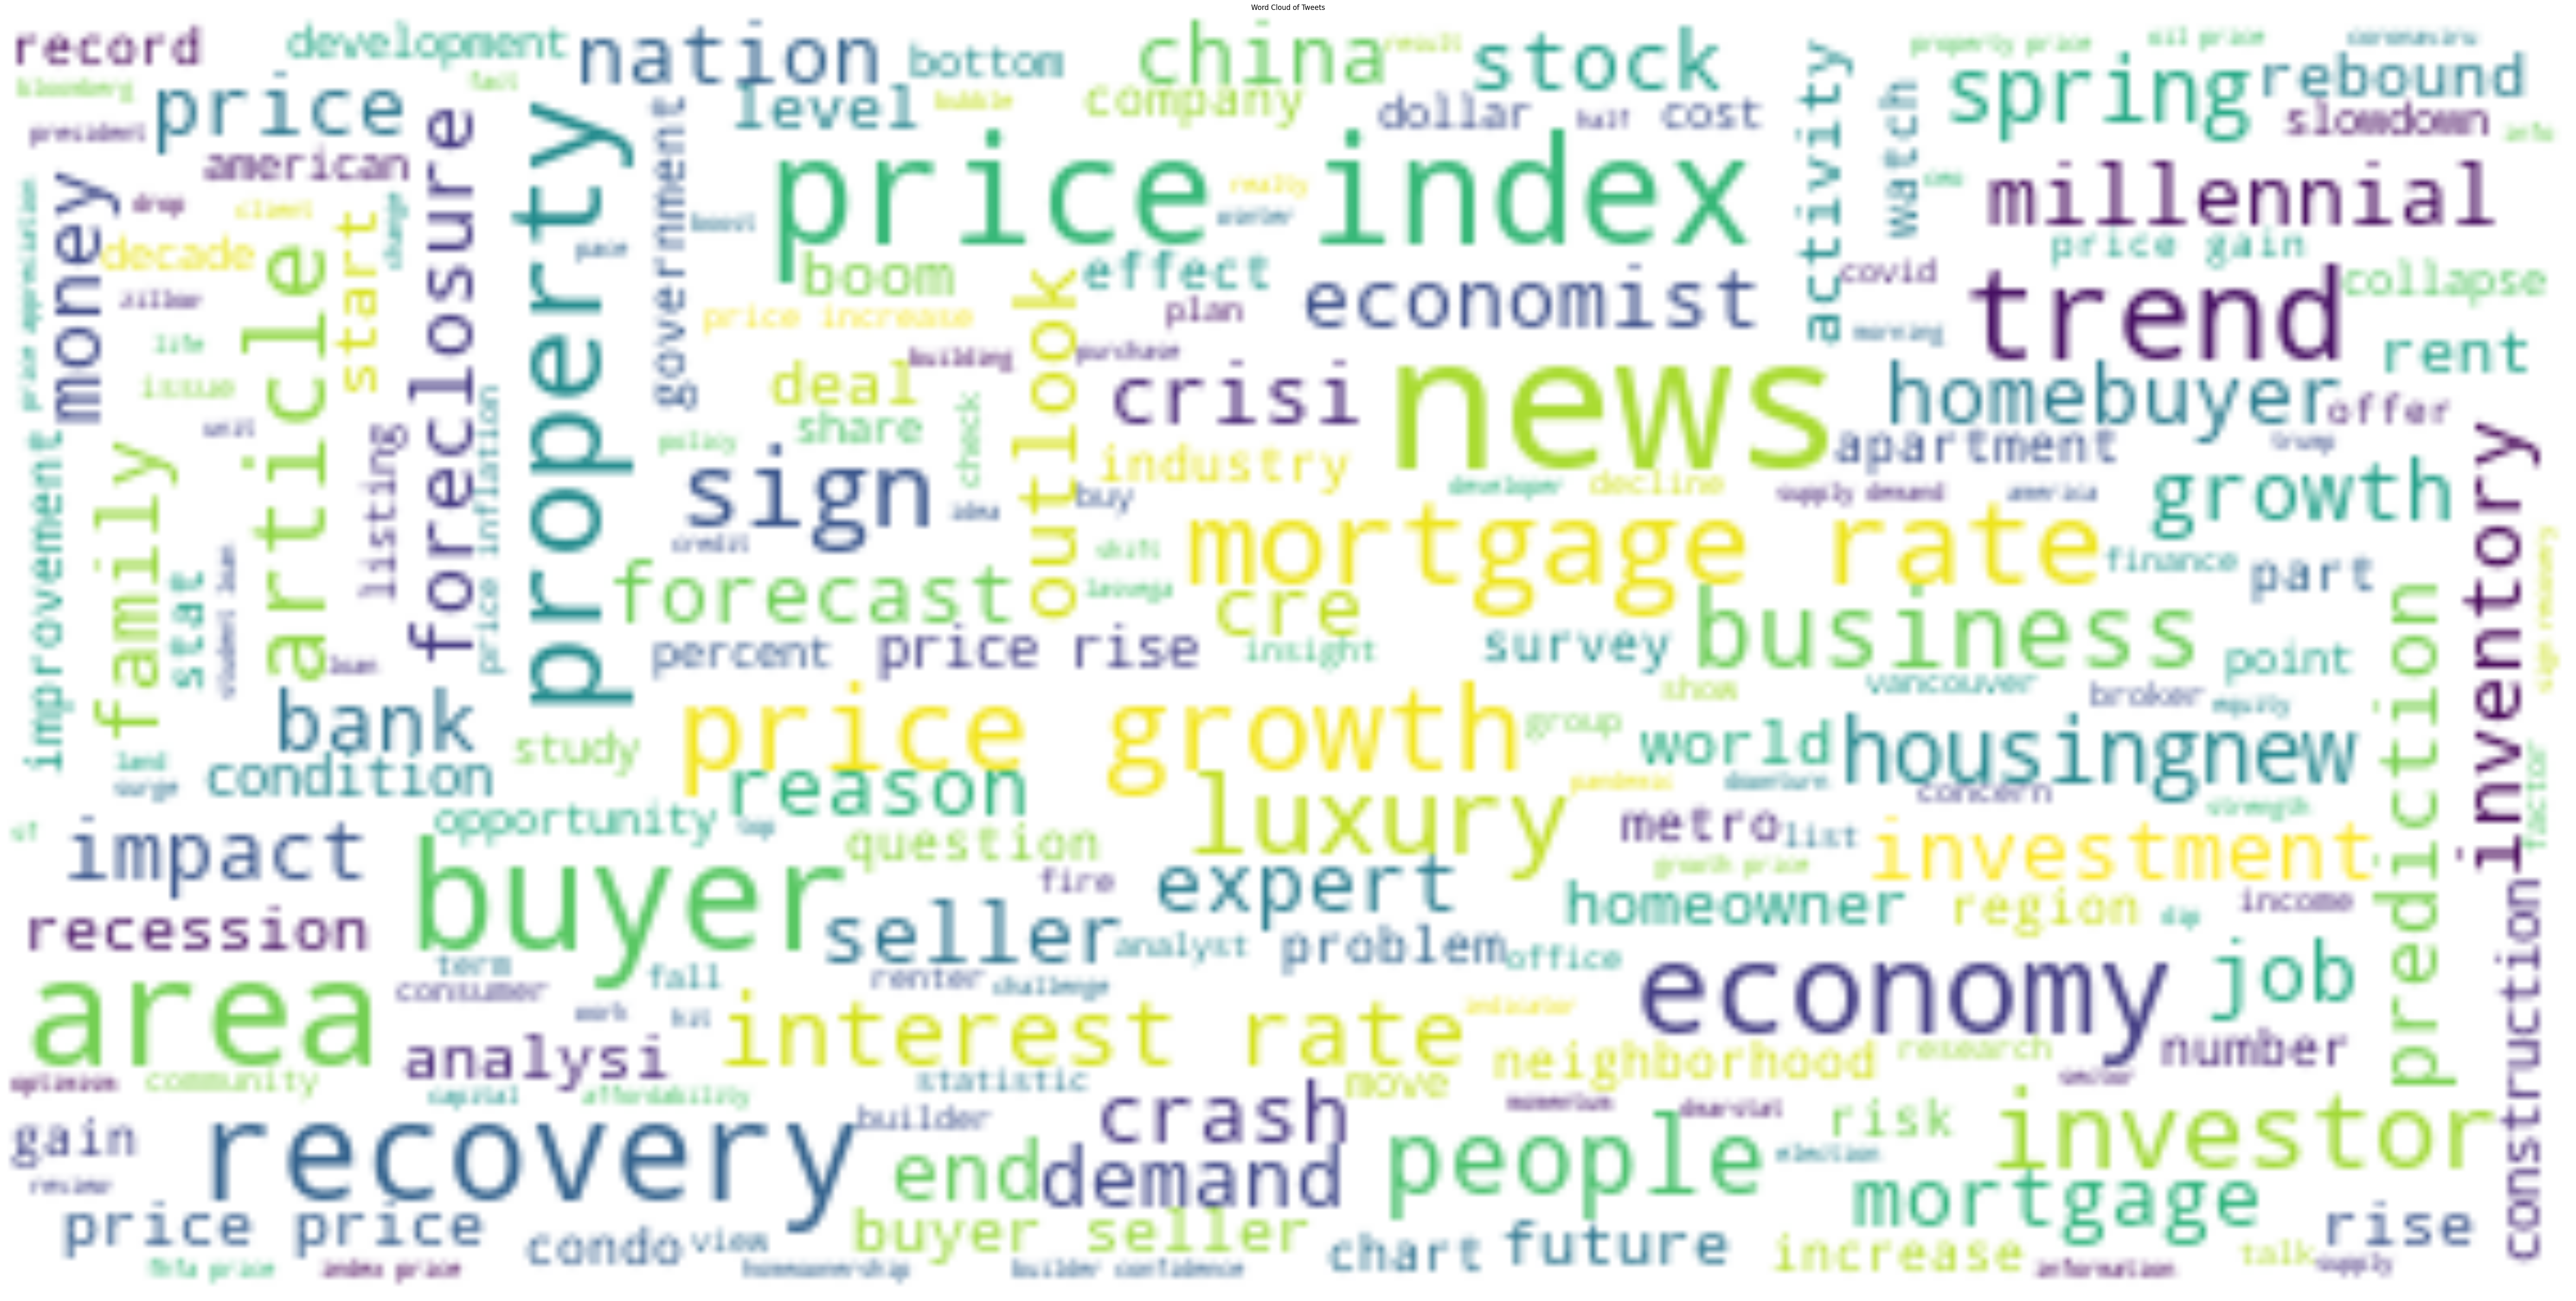

In [15]:
#Generate the word cloud
from wordcloud import WordCloud
# Flatten the list of tokens into a single list
all_tokens = filtered_df['text'].sum()

# Join the list of tokens into a single string
all_text = ' '.join(all_tokens)

# Generate a wordcloud from the string
wordcloud = WordCloud(max_font_size=30, background_color='white').generate(all_text)
#, contour_color = 'black', contour_width = 2, color_func = lambda *args, **kwargs: 'black'
# Set the width and height of the figure
plt.figure(figsize=(80, 50))

# Display the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')

# Turn off the axis labels
plt.axis("off")

# Set the title of the plot
plt.title("Word Cloud of Tweets")

# Display the plot
plt.show()


In [16]:
# Run LDA model
import numpy as np
import json
import glob

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim_models


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
id2word = corpora.Dictionary(filtered_df.text)

corpus = []
for wordi in filtered_df.text:
    new = id2word.doc2bow(wordi)
    corpus.append(new)
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=13,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=50,
                                           passes=10,
                                           alpha="auto")

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=20)
vis


c:\Users\myloe\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
c:\Users\myloe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11     0.404638 -0.283611       1        1  28.903220
4     -0.082818 -0.504542       2        1  25.502372
0     -0.461415 -0.189405       3        1  13.263131
12    -0.322141  0.355078       4        1   6.010334
10     0.152940 -0.352044       5        1   5.250758
5      0.469743  0.008487       6        1   4.633888
9     -0.042084  0.452866       7        1   4.096207
2     -0.206380 -0.251642       8        1   3.657837
8     -0.396658  0.097428       9        1   3.499660
3      0.228413  0.384596      10        1   3.388857
6      0.276448  0.161829      11        1   1.739742
7     -0.010343  0.060480      12        1   0.027004
1     -0.010343  0.060480      13        1   0.026989, topic_info=            Term         Freq         Total Category  logprob  loglift
78         price  58993.00000  58993.000000  Default  20.0000  20.0000
72         buyer  21183.00000  21183.000000  Default  19.0000  19.0000
182       seller  12428.00000  12428.000000  Default  18.0000  18.0000
496       expert  12141.00000  12141.000000  Default  17.0000  17.0000
27      property   9190.00000   9190.000000  Default  16.0000  16.0000
..           ...          ...           ...      ...      ...      ...
13    charleston      0.00555      6.124640  Topic13 -10.8158   1.2112
15          mend      0.00555      0.653992  Topic13 -10.8158   3.4482
16         trade      0.00555    105.820499  Topic13 -10.8158  -1.6382
17       buffett      0.00555      0.653557  Topic13 -10.8158   3.4488
19   billionaire      0.00555    236.344086  Topic13 -10.8158  -2.4418

[320 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
96        5  0.999804       activity
11        8  0.999797      advantage
607       1  0.999680  affordability
241       5  0.999769         answer
318       3  0.999601      apartment
...     ...       ...            ...
1016      4  0.999974         winter
579       4  0.999942           work
56        4  0.999531          world
951       3  0.999834         zillow
2501      7  0.996038         zombie

[236 rows x 3 columns], R=20, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 5, 1, 13, 11, 6, 10, 3, 9, 4, 7, 8, 2])

In [17]:
#Export the topics and words with corresponding weights to csv file
import csv

topics = lda_model.print_topics(num_words=20)
perplexity = lda_model.log_perplexity(corpus)


with open('topics13.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Topic', 'Words', 'Weight','Perplexity','Coherence'])
    for topic in topics:
        topic_num = topic[0]+1
        topic_words = topic[1].split('+')
        for word in topic_words:
            word_data = word.split('*')
            word_weight = word_data[0]
            word_name = word_data[1]
            writer.writerow([topic_num, word_name, word_weight, perplexity])